In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kiwo = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/kiwo.csv')
sales = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/umsatzdaten_gekuerzt.csv')
wetter = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/wetter.csv')

kiwo['Datum'] = pd.to_datetime(kiwo['Datum'], format='%Y-%m-%d')
sales['Datum'] = pd.to_datetime(sales['Datum'], format='%Y-%m-%d')
wetter['Datum'] = pd.to_datetime(wetter['Datum'], format='%Y-%m-%d')

In [3]:
# Merge the dataframes
df = pd.merge(sales, kiwo, on='Datum', how='outer')
df = pd.merge(df, wetter, on='Datum', how='outer')

df 

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,NaN,2012-01-01,NaN,NaN,NaN,8.0,9.8250,14.0,58.0
1,NaN,2012-01-02,NaN,NaN,NaN,7.0,7.4375,12.0,NaN
2,NaN,2012-01-03,NaN,NaN,NaN,8.0,5.5375,18.0,63.0
3,NaN,2012-01-04,NaN,NaN,NaN,4.0,5.6875,19.0,80.0
4,NaN,2012-01-05,NaN,NaN,NaN,6.0,5.3000,23.0,80.0
...,...,...,...,...,...,...,...,...,...
10114,NaN,2019-07-28,NaN,NaN,NaN,3.0,23.3500,14.0,5.0
10115,NaN,2019-07-29,NaN,NaN,NaN,6.0,25.2500,7.0,61.0
10116,NaN,2019-07-30,NaN,NaN,NaN,7.0,20.7375,8.0,61.0
10117,NaN,2019-07-31,NaN,NaN,NaN,6.0,20.4500,7.0,61.0


In [4]:
# Calculate the total daily sales - group by date
df['total_sales'] = df.groupby('Datum')['Umsatz'].transform('sum')
df

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,total_sales
0,NaN,2012-01-01,NaN,NaN,NaN,8.0,9.8250,14.0,58.0,0.0
1,NaN,2012-01-02,NaN,NaN,NaN,7.0,7.4375,12.0,NaN,0.0
2,NaN,2012-01-03,NaN,NaN,NaN,8.0,5.5375,18.0,63.0,0.0
3,NaN,2012-01-04,NaN,NaN,NaN,4.0,5.6875,19.0,80.0,0.0
4,NaN,2012-01-05,NaN,NaN,NaN,6.0,5.3000,23.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10114,NaN,2019-07-28,NaN,NaN,NaN,3.0,23.3500,14.0,5.0,0.0
10115,NaN,2019-07-29,NaN,NaN,NaN,6.0,25.2500,7.0,61.0,0.0
10116,NaN,2019-07-30,NaN,NaN,NaN,7.0,20.7375,8.0,61.0,0.0
10117,NaN,2019-07-31,NaN,NaN,NaN,6.0,20.4500,7.0,61.0,0.0


In [5]:
df[df["Datum"]== "2013-07-01"]

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,total_sales
394,1307011.0,2013-07-01,1.0,148.828353,NaN,6.0,17.8375,15.0,20.0,1269.249107
395,1307012.0,2013-07-01,2.0,535.856285,NaN,6.0,17.8375,15.0,20.0,1269.249107
396,1307013.0,2013-07-01,3.0,201.198426,NaN,6.0,17.8375,15.0,20.0,1269.249107
397,1307014.0,2013-07-01,4.0,65.890169,NaN,6.0,17.8375,15.0,20.0,1269.249107
398,1307015.0,2013-07-01,5.0,317.475875,NaN,6.0,17.8375,15.0,20.0,1269.249107


In [6]:
# Descriptive statistics   
df.describe()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,total_sales
count,9.334000e+03,10119,9334.000000,9334.000000,250.0,10048.000000,10103.000000,10103.000000,7581.000000,10119.000000
mean,1.559311e+06,2016-01-04 09:37:20.260895488,3.088172,206.749044,1.0,4.748507,12.014560,11.026527,37.072022,974.008568
min,1.307011e+06,2012-01-01 00:00:00,1.000000,7.051201,1.0,0.000000,-10.250000,3.000000,0.000000,0.000000
25%,1.410123e+06,2014-08-31 00:00:00,2.000000,96.897441,1.0,3.000000,6.250000,8.000000,10.000000,804.047113
50%,1.601102e+06,2016-01-06 00:00:00,3.000000,161.900831,1.0,6.000000,11.625000,10.000000,28.000000,965.250835
75%,1.704223e+06,2017-05-26 00:00:00,4.000000,280.644663,1.0,7.000000,17.875000,13.000000,61.000000,1201.121391
max,1.807315e+06,2019-08-01 00:00:00,6.000000,1879.461831,1.0,8.000000,32.671428,35.000000,95.000000,3156.413344
std,1.512503e+05,NaN,1.489002,144.545189,0.0,2.628285,7.212466,4.131774,27.207627,395.017779


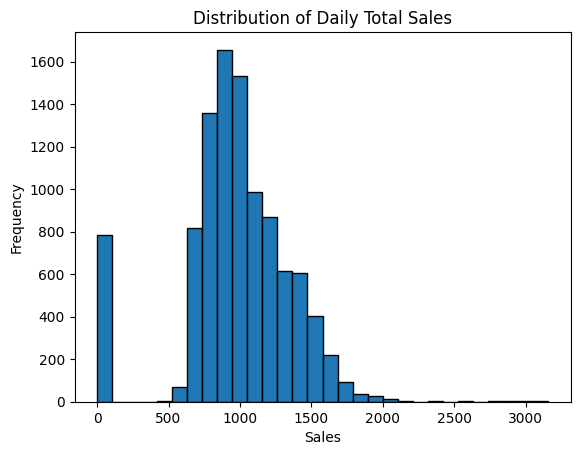

In [7]:
# Distribution of daily total sales
plt.hist(df['total_sales'], bins=30, edgecolor='black')
plt.title('Distribution of Daily Total Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

1. Distribution of daily total sales is right-skewed, suggesting outliers - occational high sales days.
2. Most data fall between 700 - 1400 


<Figure size 1000x600 with 0 Axes>

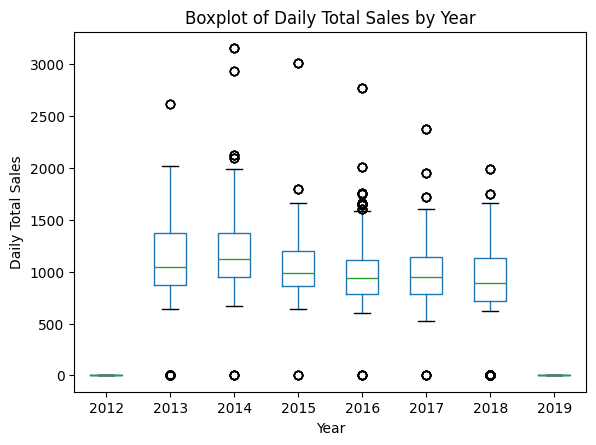

In [8]:
# Create boxplot for daily total sales by year
df['Jahr'] = pd.to_datetime(df['Datum']).dt.year
plt.figure(figsize=(10, 6))
df.boxplot(column='total_sales', by='Jahr', grid=False)
plt.title('Boxplot of Daily Total Sales by Year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Daily Total Sales')
plt.show()

1. Central tendency 
* Medians of daily total sales are relatively stable across years, with a slight dip around 2015 - 2017. 
* Core sales performance on a typical day was quite consistent, but slightly stronger in early years.

2. Variablity 
2.1. IQR
* 2013-2014 show wider boxes, while 2016-2017 are narrower
* There were more fluctuation in mid-range sales early on, while the performance got more stable in later years 
2.2. Range 
* 2013-2014 the whiskers were higher, while later years they were shorter and lower
* There was a broader spread of sales activity in earlier years, and sales became more predictable in later years

3. Outliers
* There were outliers every year, which were generally above 2000 in daily total sales, but 2014-2016 seems to have more extreme values
* There are regularly high-sales days

4. Year-by-year comparison
* Business shows a quite consistent in operations due to similar structure of sales performance across years
* The demand base seems to be steady due to the stable overall typical sales level
* After the first 2 years, the decreased variability suggests increased consistency in sales performance.   



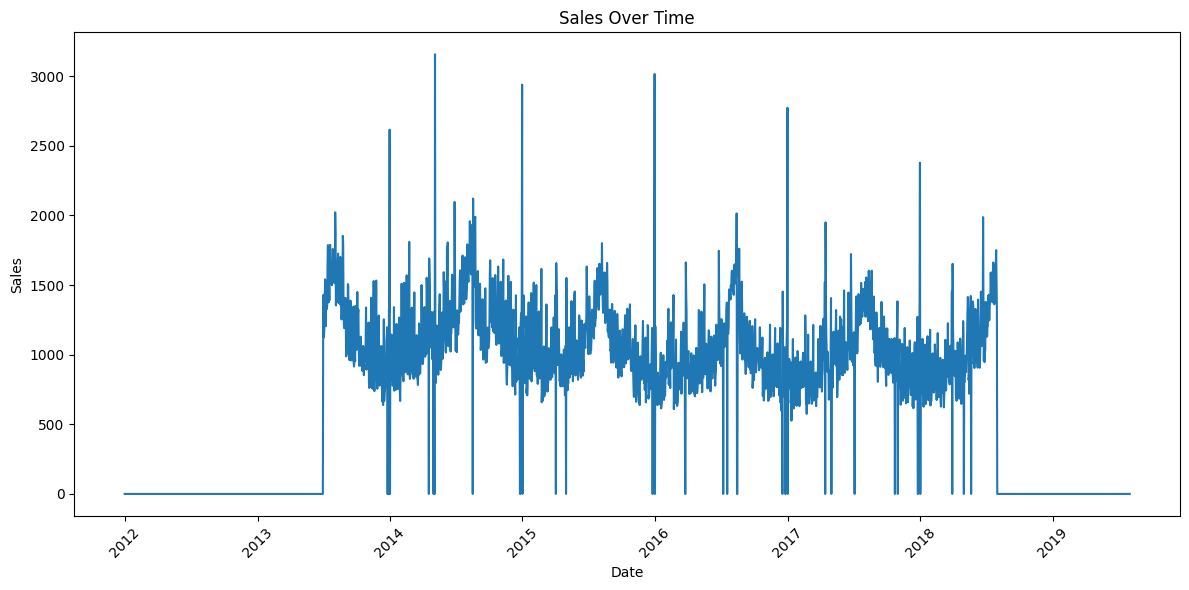

In [9]:
# Plot a timeseries of sales
df.sort_values('Datum', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df['Datum'], df['total_sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Patterns
* Business is seasonal with several extreme peaks with the highest at the end of every year
* Stable trend with no obvious upward or downward drift over years

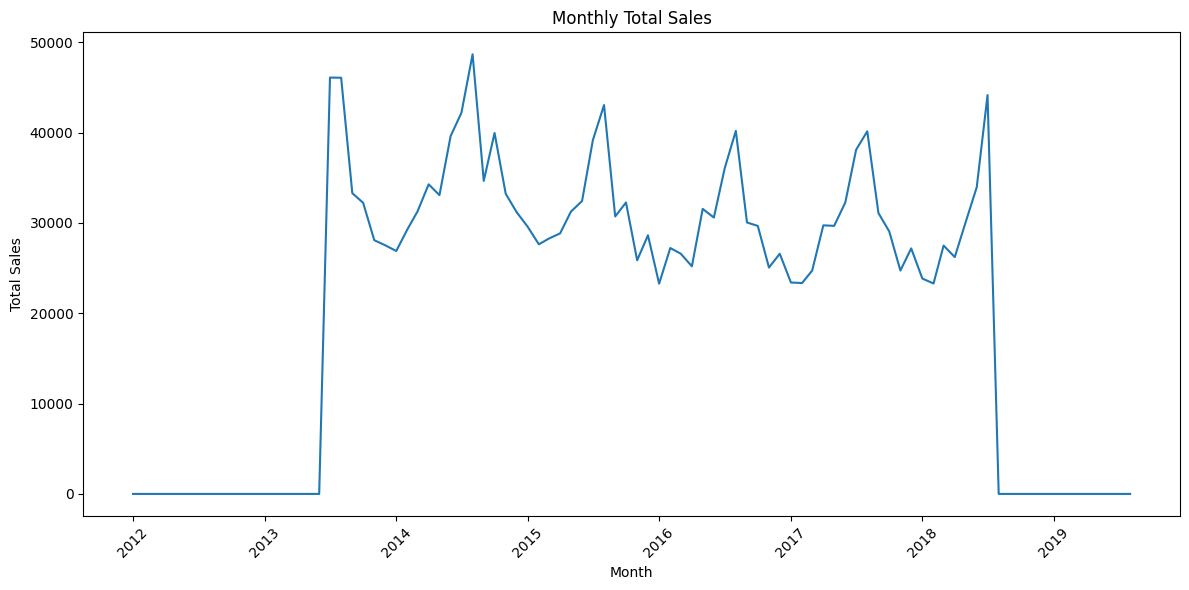

In [10]:
# Create a timeseries for the aggregated sales data (monthly) - Xaxis shows the month e.g. 2020-01
df['Datum'] = pd.to_datetime(df['Datum'])
df['YearMonth'] = df['Datum'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Umsatz'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Umsatz'])
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

More smooth than daily view > Capture macro- trends
* Strong repeating seasonal highs: Annual cycles with highest sales in June-July 
* Variability ~20000
* Long-term trend: No strong linear trend

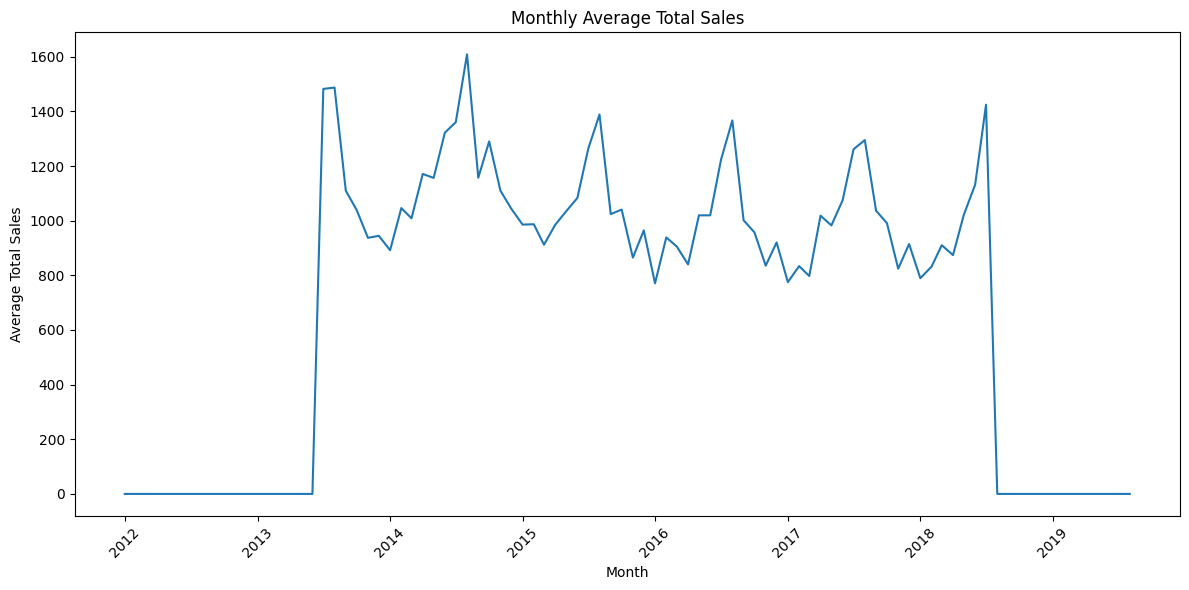

In [11]:
# Create a timeseries plot of the average total daily sales data (monthly) - Xaxis shows the month e.g. 2020-01
monthly_avg_sales = df.groupby('YearMonth')['total_sales'].mean().reset_index()
monthly_avg_sales['YearMonth'] = monthly_avg_sales['YearMonth'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_sales['YearMonth'], monthly_avg_sales['total_sales'])
plt.title('Monthly Average Total Sales')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

More smooth than daily view > Capture macro- trends but controls for different month lengths
* Clear seasonal trend with consistent drops after peak months (June-July)
* Monthly averages seems to be consistent in the range of 20000 (Consistent, resilient, season-dependent)

# Inspection of economic indicator

### Statistisches Bundesamt (Destatis), 2025.
Data source: https://www.destatis.de/EN/Service/OpenData/short-term-indicators.html#

* GDP - Gross Dosmestic Product - Quarterly - in current prices, billion EUR, original value
* CPI - Consumer Price Index - Monthly - Original value, 2020=100
* Unemployment rate - Monthly - Unemployment rate of all civilian labor force, total in %

In [12]:
cpi_url = 'https://www.destatis.de/static/de_/opendata/data/verbraucherpreisindex_gesamtindex_bv41.csv'
gdp_url = 'https://www.destatis.de/static/de_/opendata/data/bruttoinlandsprodukt_originalwert.csv'
unemp_url = 'https://www.destatis.de/static/de_/opendata/data/arbeitslosenquote_deutschland_originalwert.csv'

# Read the economic data from the URLs
cpi = pd.read_csv(cpi_url, sep=';', skiprows=1)
gdp = pd.read_csv(gdp_url, sep=';', skiprows=1)
unemp = pd.read_csv(unemp_url, sep=';', encoding='latin-1', skiprows=1, on_bad_lines='skip')
# Convert the 'Datum' column to datetime format
cpi['Datum'] = pd.to_datetime(cpi['Datum'], format='%d/%m/%Y')
gdp['Datum'] = pd.to_datetime(gdp['Datum'], format='%d/%m/%Y')
unemp['Datum'] = pd.to_datetime(unemp['Datum'], format='%d/%m/%Y')

In [13]:
# Keep the first 2 columns and rename them
cpi = cpi[['Datum', 'Originalwert, 2020=100']]
gdp = gdp[['Datum', 'in jeweiligen Preisen, Mrd. EUR, Originalwert']]
unemp = unemp[['Datum', 'Arbeitslosenquote aller zivilen Erwerbspersonen, insgesamt in %']]
# Rename the columns
cpi.columns = ['Datum', 'CPI']
gdp.columns = ['Datum', 'GDP']
unemp.columns = ['Datum', 'Unemployment']

In [14]:
# Merge dataframes
econ = pd.merge(cpi, unemp, on='Datum', how='outer')

# Get the quarter from the date, format it to YYYY-MM-DD and convert it to a timestamp
econ['quarter'] = econ['Datum'].dt.to_period('Q').dt.start_time.dt.strftime('%Y-%m-%d')
econ['quarter'] = pd.to_datetime(econ['quarter'], format='%Y-%m-%d')

# Merge the GDP data
econ = pd.merge(econ, gdp, left_on='quarter', right_on='Datum', how='outer')

In [15]:
# Drop columns that are not needed
econ.drop(columns=['Datum_y', 'quarter'], inplace=True)
econ.rename(columns={'Datum_x': 'Datum'}, inplace=True)


In [16]:
# Merge the dataframes
df_2 = pd.merge(df, econ, on='Datum', how='outer') 


In [17]:
# Convert object to float64 
df_2['GDP'] = df_2['GDP'].str.replace(',', '.').astype(float)
df_2['CPI'] = df_2['CPI'].str.replace(',', '.').astype(float)
df_2['Unemployment'] = df_2['Unemployment'].str.replace(',', '.').astype(float)


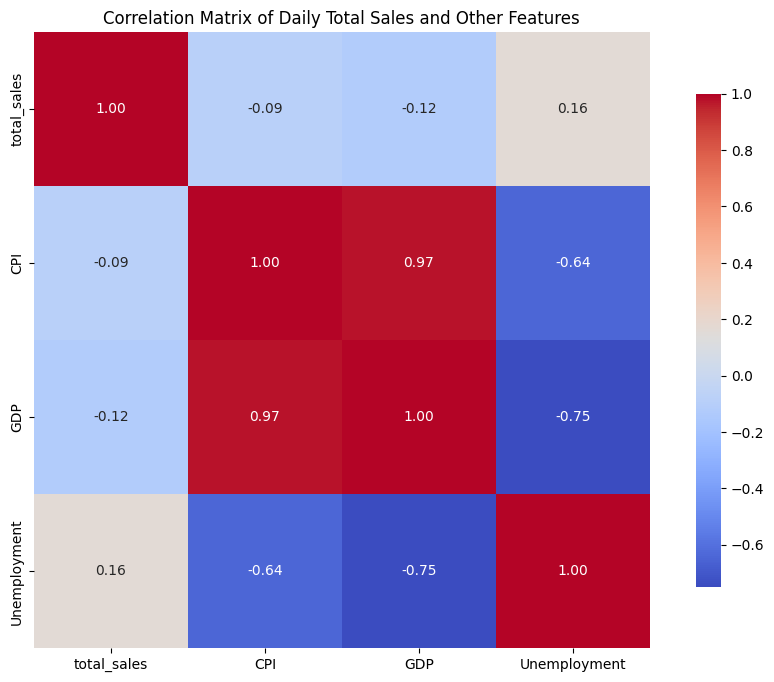

In [18]:
# Correlation matrix of daily total sales and other features
# Select relevant columns for correlation analysis
correlation_columns = ['total_sales', 'CPI', 'GDP', 'Unemployment']
correlation_matrix = df_2[correlation_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Daily Total Sales and Other Features')
plt.show()